In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [7]:
dataset = pd.read_csv('salarios.csv')
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [4]:
dataset.shape

(30, 2)

In [0]:
# Tomar los valores de cada columna dividiendolo en x y y
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values

In [0]:
# dividimos nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

In [9]:
# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<function matplotlib.pyplot.show>

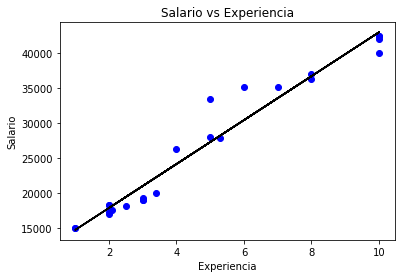

In [10]:
# ploteamos datos de entrenamiento para ver si realmente el 
# modelo lo hizo bien, entreno como se debe
# Grafica tipo Scatter
viz_train = plt
viz_train.scatter(X_train, Y_train, color = 'blue')
viz_train.plot(X_train, regressor.predict(X_train),color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show

<function matplotlib.pyplot.show>

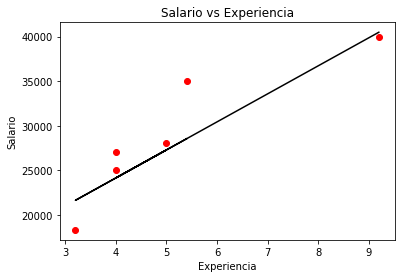

In [11]:
# validamos con nuestros datos de prueba
viz_train = plt
viz_train.scatter(X_test, Y_test, color = 'red')
viz_train.plot(X_test, regressor.predict(X_test),color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show

In [12]:
# Miramos el performance de nuestro modelo
# 78% de los datos usados para validar aprendizaje lo
# va hacer de forma correcta
# nos acercamos a 100 si lo volvemos en modelo multiple
regressor.score(X_test, Y_test)

0.7862437374732997

0.8058310383374175


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

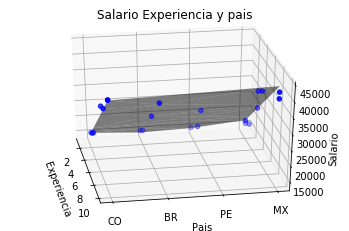

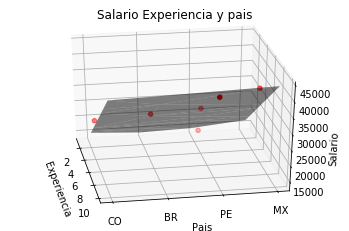

In [56]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

# defino los paises en list paises
paises = ['CO','BR','PE','MX']

# llevo cada elemento de paises a que sea convertido a un numero
le1 = preprocessing.LabelEncoder()
paises_encoded = le1.fit_transform(paises)

# de forma aleatoria creo 30 elementos para 
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]

# paises codificados y en lista pasados al dataset
dataset['pais'] = paises_dataset


# Dividiendo las columnas en x y y
x = dataset.drop('Salario', axis=1)
y = dataset.iloc[:,1].values

# dividimos nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Evaluamos performance
print(regressor.score(X_test, Y_test))

# ploteamos datos de entrenamiento para ver si realmente el 
# modelo lo hizo bien, se entreno como se debe
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'],X_train['pais'], Y_train, color = 'blue')
viz_train.plot_trisurf(X_train['Aexperiencia'],X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

# probamos con datos de test
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_test['Aexperiencia'],X_test['pais'], Y_test, color = 'red')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

# dataset['pais'] = le1.inverse_transform(dataset['pais'])

In [55]:
len(dataset)

30